# Andrew Cerqueira Martins

Você pode me encontrar nas seguintes plataformas:
- [LinkedIn](https://www.linkedin.com/in/andrewcerqueira/)
- [GitHub](https://github.com/Andy-Martins)
- [Instagram](https://www.instagram.com/andy.martins/)

# Comparação de Modelos de Regressão com Dados de Teste

Neste notebook, vamos treinar três modelos de regressão com o conjunto de dados "California Housing", fazer previsões usando esses modelos em um conjunto de dados de teste e comparar os resultados com os valores reais.

### **1. Importar Bibliotecas e dados**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.datasets import fetch_california_housing #Dataset usado para treinamento

### **2. Carregar e Preparar os Dados**

Vamos carregar o conjunto de dados "California Housing", dividir os dados em conjuntos de treinamento e teste, e normalizar os dados.


In [ ]:
# Carregar o conjunto de dados California Housing
data = fetch_california_housing()
X = data.data
y = data.target

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **3. Treinar os Modelos**

Vamos treinar três modelos de regressão: Regressão Linear, SVR (Máquina de Vetores de Suporte para Regressão) e Regressor de Árvore de Decisão.


In [ ]:
# Inicializar e treinar o modelo de Regressão Linear
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

# Inicializar e treinar o modelo SVR
svr = SVR(kernel='rbf')  # Usando o kernel de função de base radial
svr.fit(X_train_scaled, y_train)

# Inicializar e treinar o modelo de Regressão com Árvore de Decisão
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

### **4. Avaliar os Modelos com Dados de Teste**

Faremos previsões com o conjunto de teste e avaliaremos o desempenho dos modelos.


In [ ]:
# Faça previsões usando os dados de teste
y_pred_linear = linear.predict(X_test_scaled)
y_pred_svr = svr.predict(X_test_scaled)
y_pred_tree = tree.predict(X_test_scaled)

# Avalie o desempenho dos modelos com os dados de teste
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Crie um DataFrame com as métricas dos modelos
metrics = {
    'LR': [mse_linear, r2_linear],
    'SVR': [mse_svr, r2_svr],
    'DT': [mse_tree, r2_tree]
}

# Crie um DataFrame com métricas como linhas
df_metrics = pd.DataFrame(metrics, index=['MSE', 'R²'])

# Exiba o DataFrame
print(df_metrics)

           LR       SVR        DT
MSE  0.555892  0.357003  0.493969
R²   0.575788  0.727564  0.623042


### **5. Compare os Resultados**

Vamos visualizar os resultados dos modelos usando gráficos.


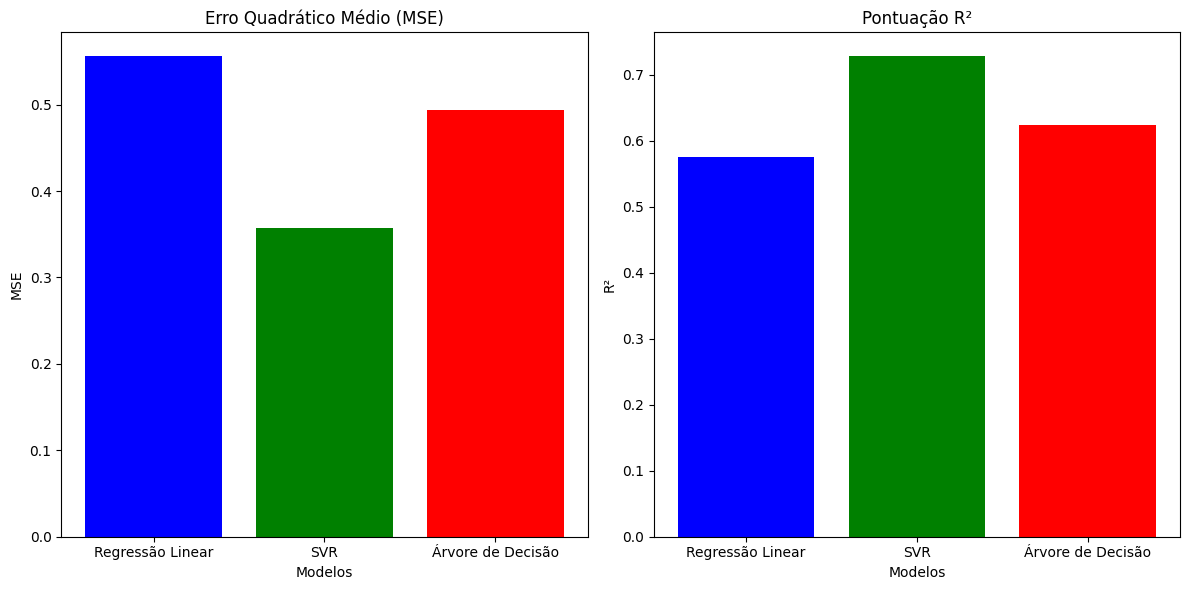

In [ ]:
# Compare Resultados
models = ['Regressão Linear', 'SVR', 'Árvore de Decisão']
mse_values = [mse_linear, mse_svr, mse_tree]
r2_values = [r2_linear, r2_svr, r2_tree]

plt.figure(figsize=(12, 6))

# Gráfico de MSE
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.title('Erro Quadrático Médio (MSE)')
plt.xlabel('Modelos')
plt.ylabel('MSE')

# Gráfico de R²
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.title('Pontuação R²')
plt.xlabel('Modelos')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

### **6. Previsão e Comparação com Amostras Selecionadas**

Selecionaremos um conjunto de amostras do conjunto de teste e compararemos as previsões dos modelos de Regressão Linear, SVR e Árvore de Decisão com os valores reais dessas amostras. Vamos exibir as previsões e os valores reais em um DataFrame e também visualizá-los graficamente para avaliar a precisão de cada modelo ao longo dessas amostras selecionadas.


In [ ]:
# Define os índices para todas as amostras de teste e obtém os valores reais e previsões dos modelos
indices = range(len(y_test))

# Define o número de pontos que serão exibidos nos gráficos
num_points = 50
sample_indices = np.arange(num_points)

# Obtém os valores reais e previsões dos modelos para os índices selecionados
y_real_sample = np.array(y_test)[sample_indices]
y_pred_linear_sample = np.array(y_pred_linear)[sample_indices]
y_pred_svr_sample = np.array(y_pred_svr)[sample_indices]
y_pred_tree_sample = np.array(y_pred_tree)[sample_indices]


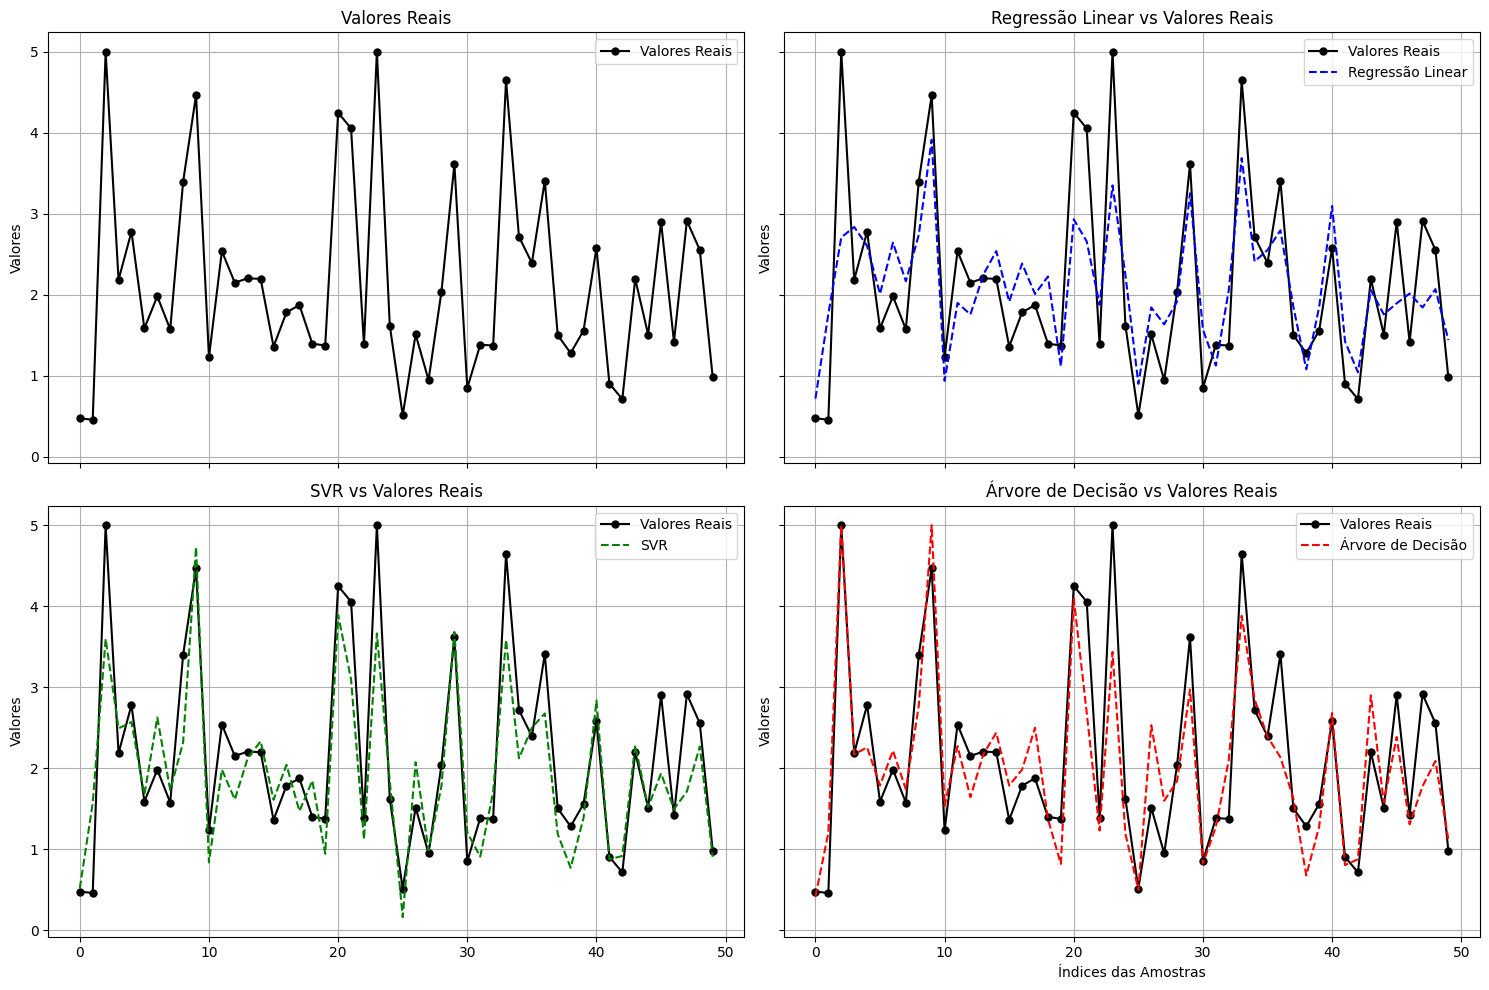

In [ ]:
# Crie o gráfico com 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Plot para Valores Reais
axs[0, 0].plot(sample_indices, y_real_sample, 'k-o', label='Valores Reais', markersize=5)
axs[0, 0].set_title('Valores Reais')
axs[0, 0].set_ylabel('Valores')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot para Regressão Linear vs Valores Reais
axs[0, 1].plot(sample_indices, y_real_sample, 'k-o', label='Valores Reais', markersize=5)
axs[0, 1].plot(sample_indices, y_pred_linear_sample, 'b--', label='Regressão Linear')
axs[0, 1].set_title('Regressão Linear vs Valores Reais')
axs[0, 1].set_ylabel('Valores')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot para SVR vs Valores Reais
axs[1, 0].plot(sample_indices, y_real_sample, 'k-o', label='Valores Reais', markersize=5)
axs[1, 0].plot(sample_indices, y_pred_svr_sample, 'g--', label='SVR')
axs[1, 0].set_title('SVR vs Valores Reais')
axs[1, 0].set_ylabel('Valores')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot para Árvore de Decisão vs Valores Reais
axs[1, 1].plot(sample_indices, y_real_sample, 'k-o', label='Valores Reais', markersize=5)
axs[1, 1].plot(sample_indices, y_pred_tree_sample, 'r--', label='Árvore de Decisão')
axs[1, 1].set_title('Árvore de Decisão vs Valores Reais')
axs[1, 1].set_xlabel('Índices das Amostras')
axs[1, 1].set_ylabel('Valores')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
